In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import progeny
import pandas as pd
import scipy.stats

sc.set_figure_params(figsize=(4, 4))

In [4]:
adata = sc.read_h5ad("../../data/40_cluster_analysis/adata_malignant_b_cells.h5ad")
artifact_dir = "../../data/70_downstream_analyses/cluster_analysis"

In [5]:
!mkdir -p {artifact_dir}

In [6]:
patient_adatas = {
    p: sc.read_h5ad(f"../../data/40_cluster_analysis/adata_{p}.h5ad")
    for p in adata.obs["patient"].unique()
}

# Cluster abundance by timepoint

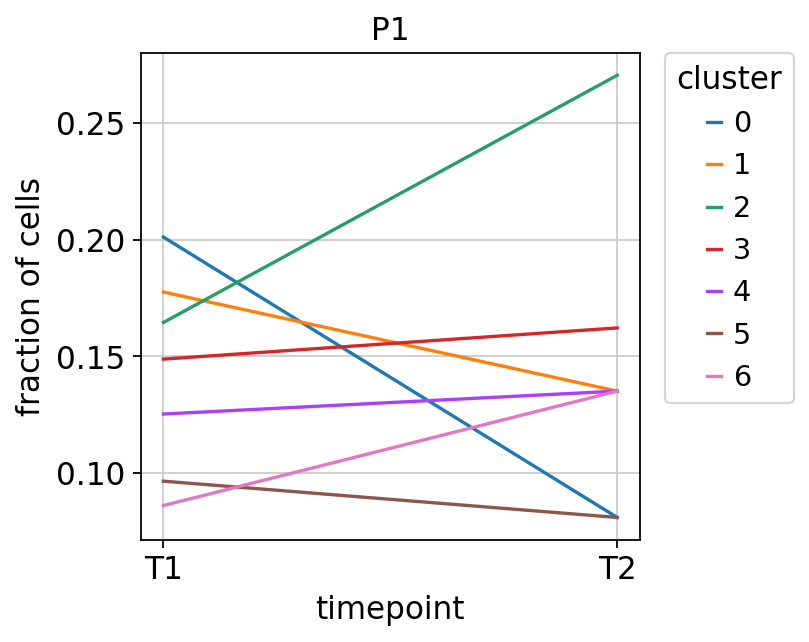

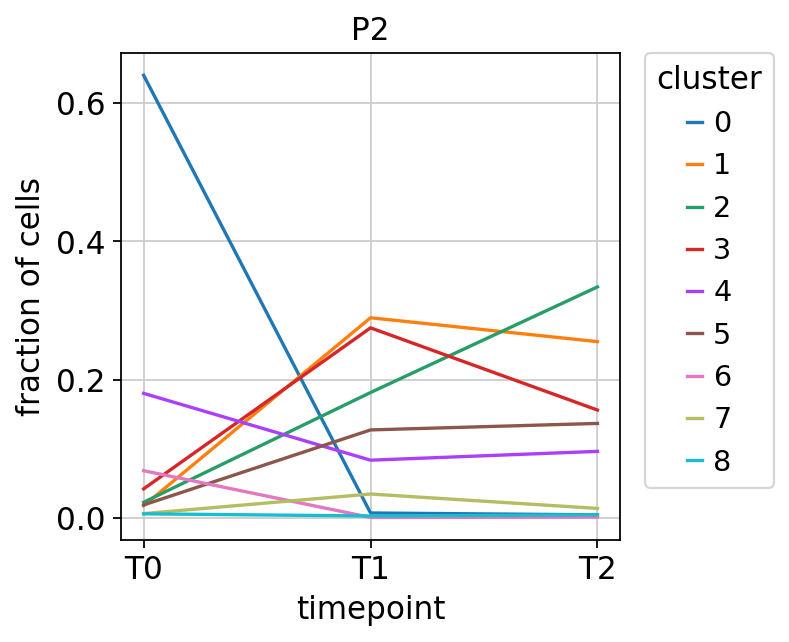

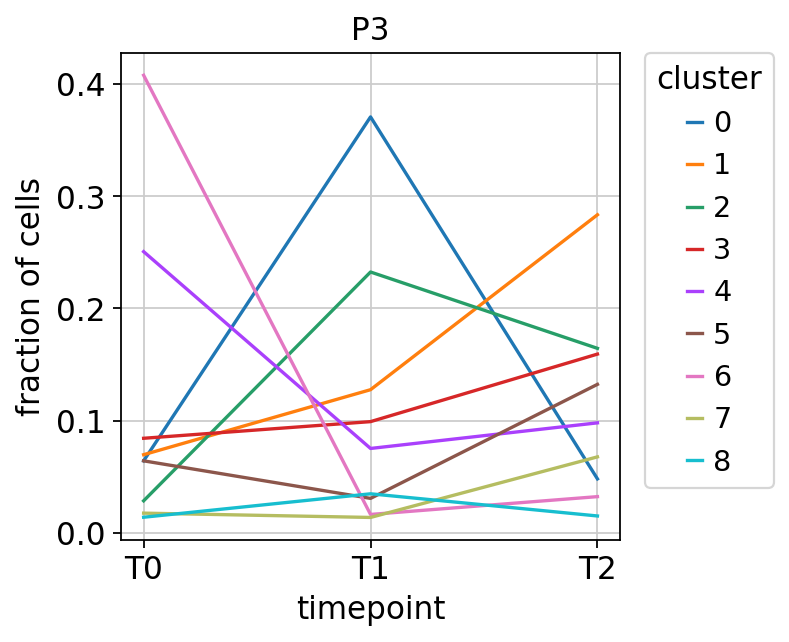

In [7]:
for patient in ["P1", "P2", "P3"]:
    cells_by_timepoint = (
        patient_adatas[patient]
        .obs.groupby(["timepoint", "leiden"])
        .size()
        .reset_index(name="n_cells")
        .groupby(["timepoint"])
        .apply(lambda df: df.assign(n_cells_per_timepoint=np.sum(df["n_cells"])))
        .pipe(
            lambda df: df.assign(frac_cells=df["n_cells"] / df["n_cells_per_timepoint"])
        )
    )
    ax = sns.lineplot(
        data=cells_by_timepoint, x="timepoint", y="frac_cells", hue="leiden"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title="cluster")
    ax.set_ylabel("fraction of cells")
    ax.set_title(patient)
    fig = ax.get_figure()
    fig.savefig(f"{artifact_dir}/cluster_abundance_{patient}.pdf", bbox_inches="tight")
    plt.show()